In [33]:
import graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('titanic_dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df.drop(columns=['Name', 'Ticket', 'Embarked', 'PassengerId', 'Cabin'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


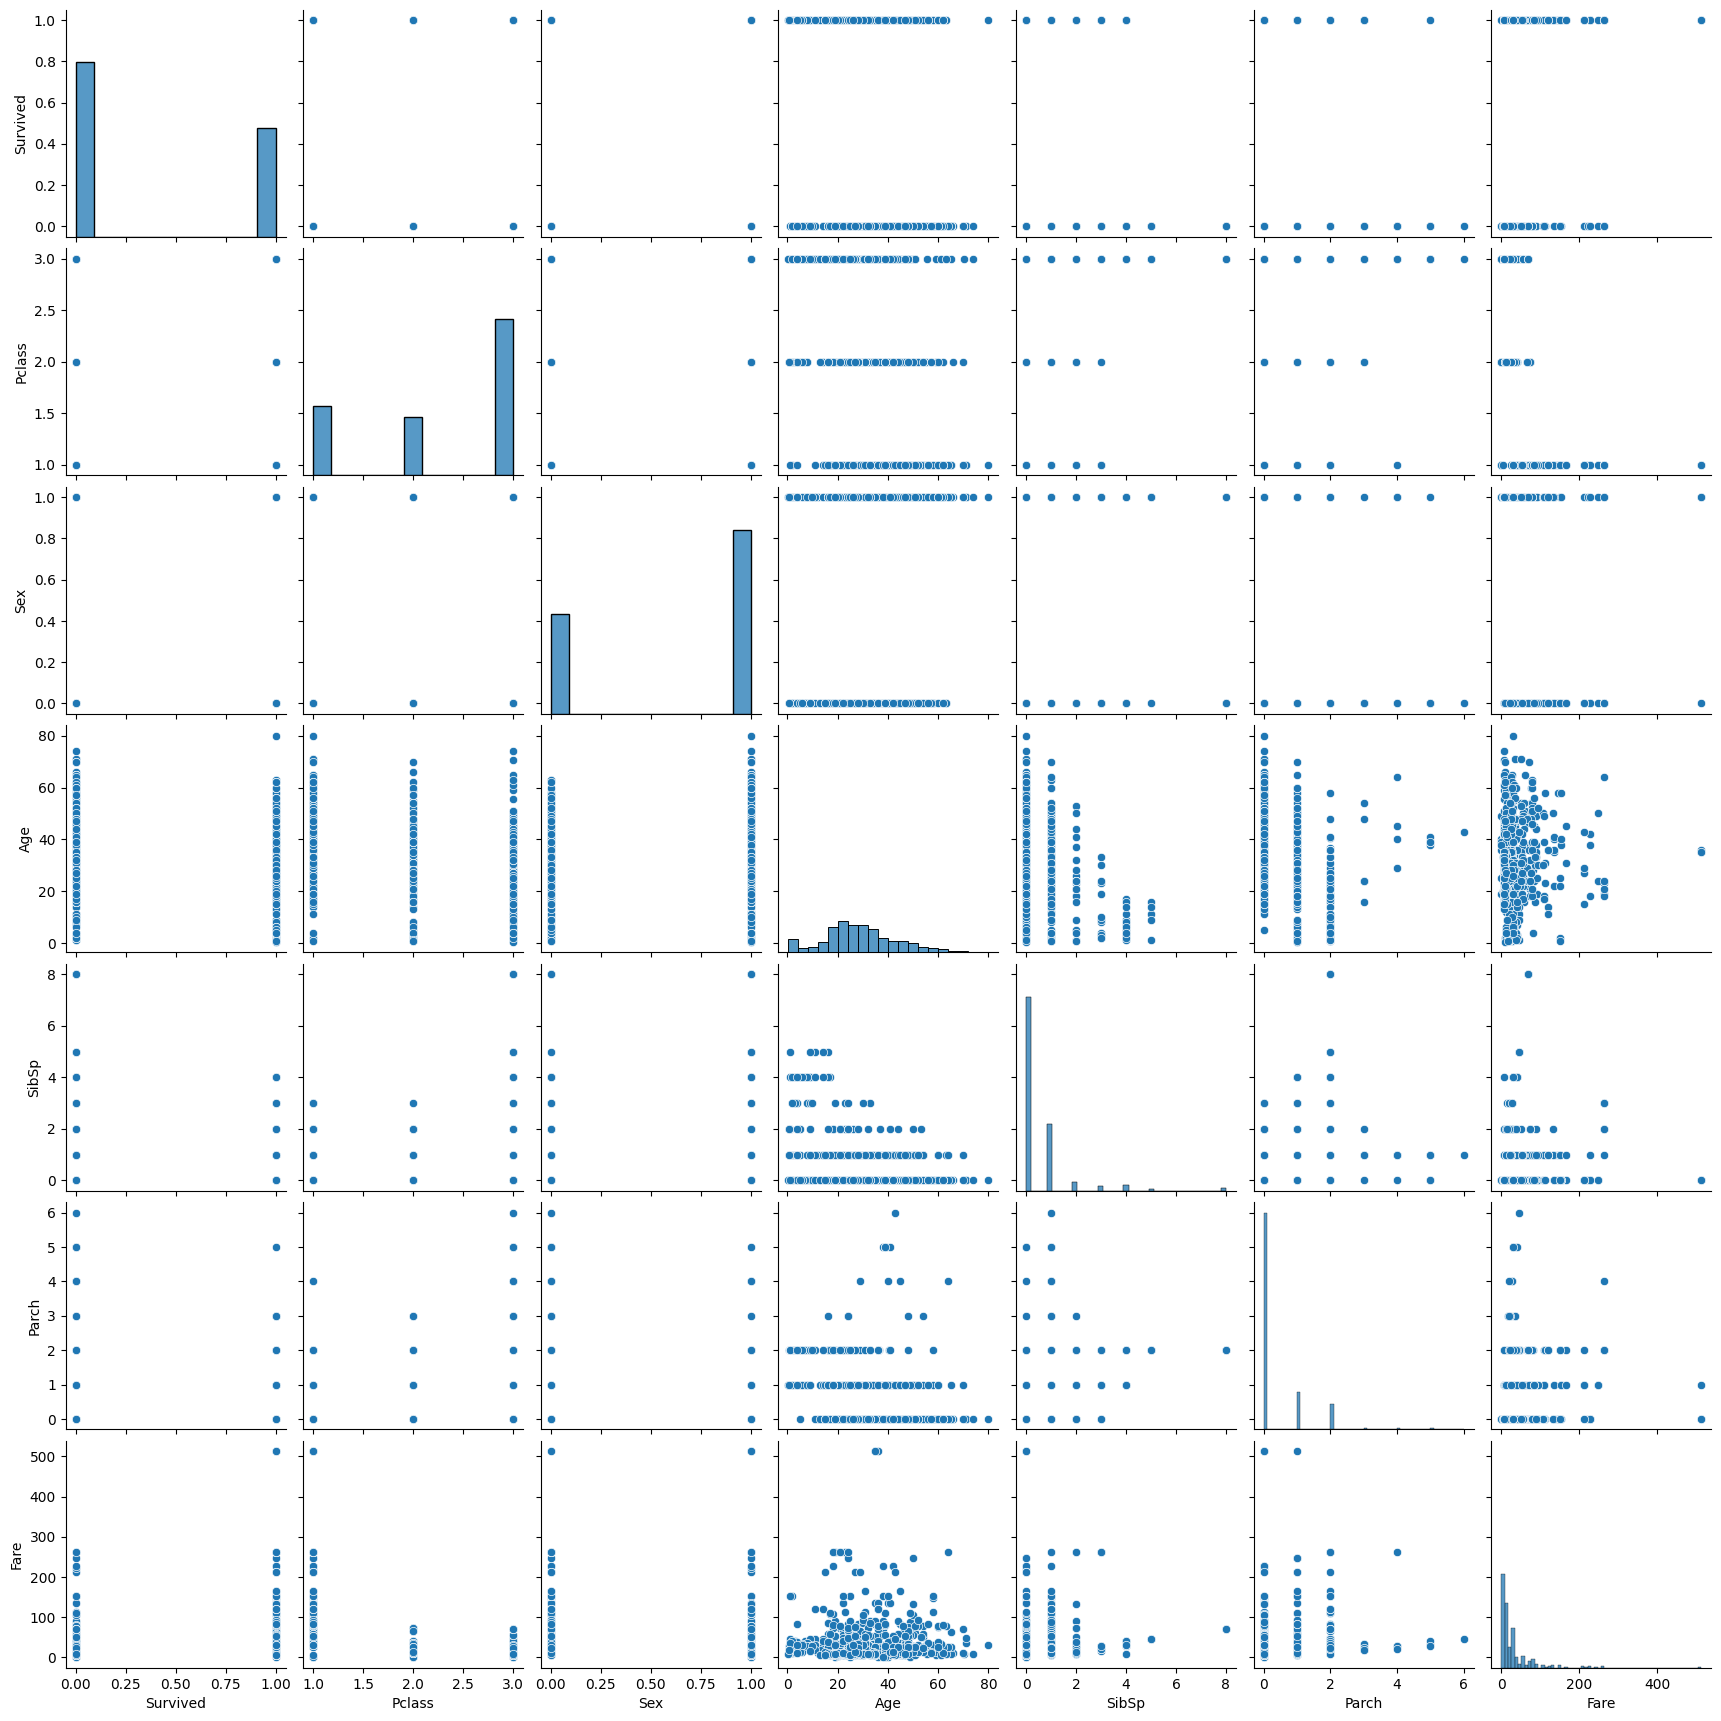

In [37]:
df['Sex'] = df['Sex'].map({'female' : 0 , 'male' : 1 })
sns.pairplot(df)

In [38]:
df.fillna({'Age' : df['Age'].mean()},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [39]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Survived')
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

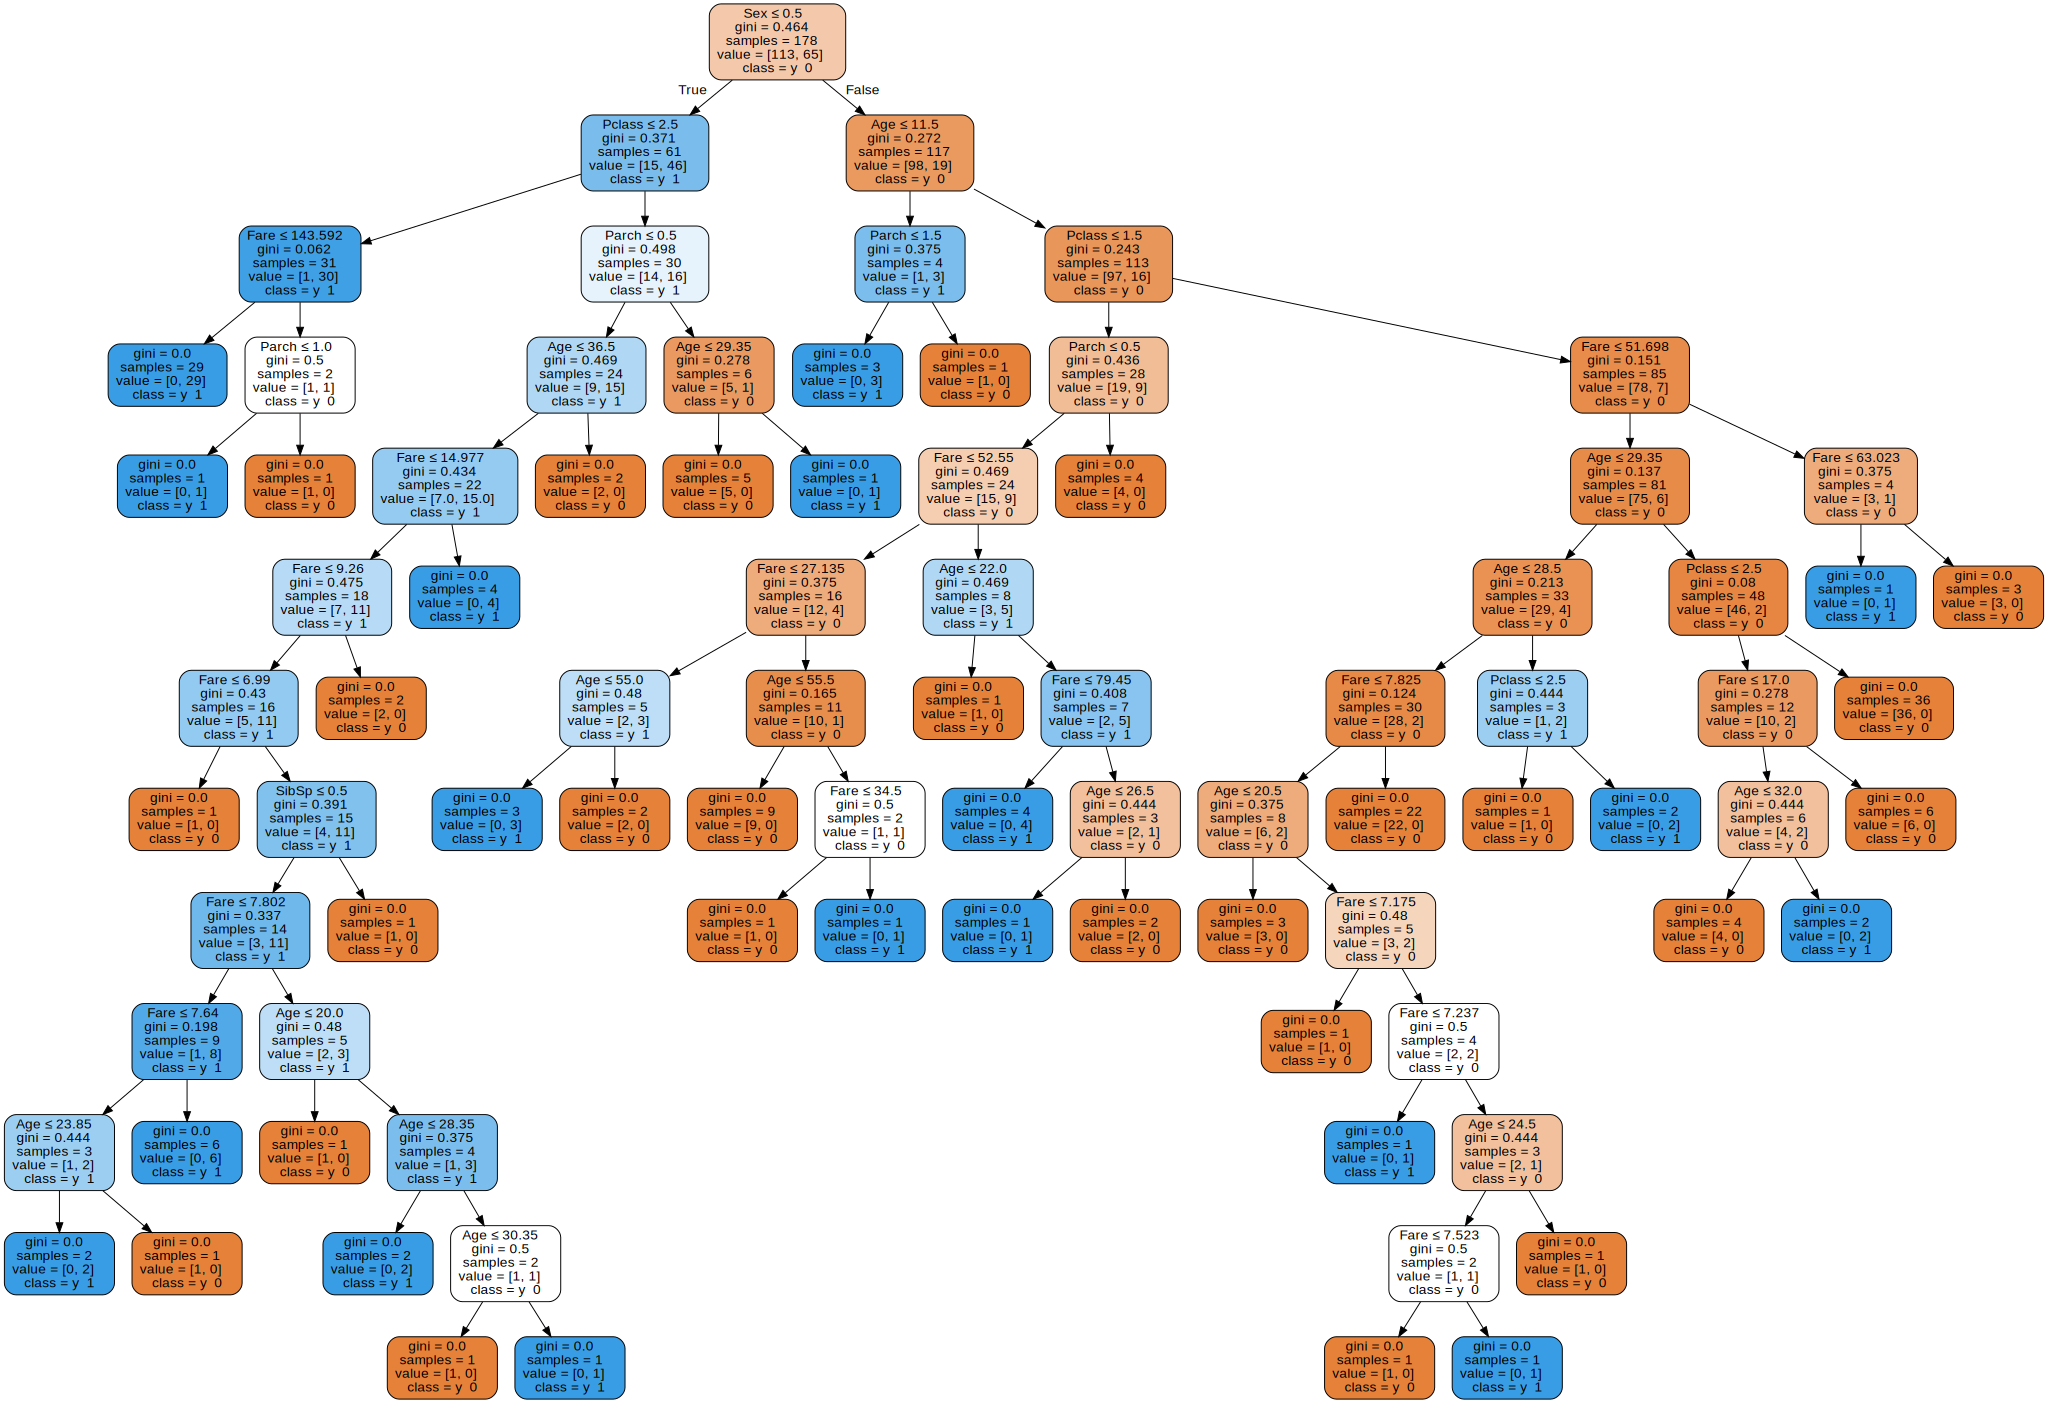

In [41]:
ddata = tree.export_graphviz(
    model,
    feature_names=x.columns,
    class_names=True,
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None
                             )
graph = graphviz.Source(ddata)
graph

Accuracy : 0.7110799438990182
Accuracy (%) : 71.10799438990182 %


<Axes: >

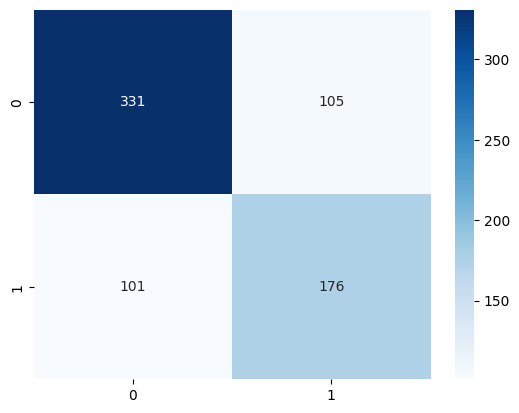

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print("Accuracy :",accuracy_score(y_pred,y_test))
print("Accuracy (%) :",accuracy_score(y_pred,y_test)*100, "%")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


In [49]:
from sklearn.model_selection import cross_val_score

scores =cross_val_score(DecisionTreeClassifier(random_state=42), x, y, cv=5)
print("Scores for each fold:", scores)
print(f"Mean accuracy: {(scores*100).mean():.2f}% with a standard deviation of {scores.std():.2f}")

Scores for each fold: [0.72067039 0.78651685 0.80898876 0.74157303 0.79775281]
Mean accuracy: 77.11% with a standard deviation of 0.03


### cross val : 77%
### normal : 71%
#### 6% difference , nice